In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
X.shape

(2000, 20)

In [6]:
y.shape

(2000,)

## Train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)

ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# KNNClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9831833333333333


# Adaboost Classifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))

ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## Now we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [log_classifier, knn_classifier,  rf_model, ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.991861,1.0,0.98,0.559186
1,0.000008,0.0,0.01,0.463282
2,0.966929,0.8,0.95,0.538202
3,0.761539,0.8,0.94,0.509875
4,0.779443,0.4,0.60,0.490344
...,...,...,...,...
595,0.024239,0.0,0.03,0.461121
596,0.000003,0.0,0.01,0.441377
597,0.984385,1.0,0.99,0.532403
598,0.001147,0.2,0.04,0.441720


In [15]:
final_prediction

0      0.882762
1      0.118323
2      0.813783
3      0.752853
4      0.567447
         ...   
595    0.128840
596    0.112845
597    0.876697
598    0.170717
599    0.837357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91373256, 0.91373256, 0.88915382, 0.88827475, 0.81336092,
       0.8130558 , 0.80930157, 0.80912833, 0.78630736, 0.78571156,
       0.77297465, 0.77287124, 0.74196856, 0.74137362, 0.70147732,
       0.70143711, 0.63616701, 0.62993537, 0.61738185, 0.61614346,
       0.59406376, 0.58800386, 0.55899047, 0.55639283, 0.55292732,
       0.53877948, 0.53595371, 0.53219563, 0.52355932, 0.49116892,
       0.4446034 , 0.39155357, 0.38629719, 0.34995613, 0.34586612,
       0.24404122, 0.23890421, 0.2346341 , 0.23146893, 0.21463088,
       0.21348417, 0.12303857, 0.1228351 , 0.10548439])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.444603,0.961667
29,0.491169,0.958333
28,0.523559,0.956667
27,0.532196,0.956667
25,0.538779,0.956667


In [18]:
accuracy_ls

,thresholds,accuracy
30,0.444603,0.961667
29,0.491169,0.958333
28,0.523559,0.956667
27,0.532196,0.956667
25,0.538779,0.956667
23,0.556393,0.956667
22,0.558990,0.955000
26,0.535954,0.955000
24,0.552927,0.955000
31,0.391554,0.950000


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

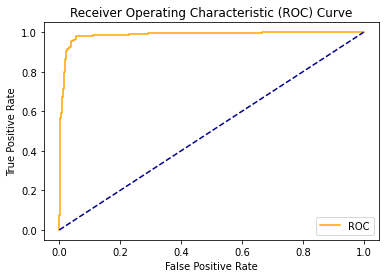

In [20]:
plot_roc_curve(fpr,tpr)